# Assignment 2 - Machine Learning Basics

## Yiran Chen
Netid:  *yc390*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [602]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. Better. As there are plenty of observations and small number of predictors, a flexible method will be able to fit the data more than an inflexible method without the worry about overfitting.
2. Worse. As the number of predictors is extremely large, a flexible method will likely lead to overfit with limited observations, and therefore worse than an inflexible method.
3. Better. A flexible method will be better dealing with complex relationships, whereas an inflexible method is better dealing with simple relationships such as linear relationship.
4. Worse. Given high variance of the error term, a flexible method will likely give a pattern following the noise more in the training set instead of the true relationship, whereas an inflexible method is more insensitive to high error variance and less likely to overfit the noise.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** It is a regression problem where we are most interested in inference. It is because CEO salary is a continuous variable and it is of interest to see what features would affect or interfere with it. Here $n$ = 500 (500 firms), $p$ = 3 (profit, number of employees, and industry).

**(b)** It is a classification problem where we are most interested in prediction. It is because we are lauching a new product and it is of interest to predict the results, i.e. whether it is a success or a failue from previous histories, rather than understanding what is affecting the results. The outcome variable is binary, success or failure. Here $n$ = 20 (observations on 20 similar products previoulsy lauched), $p$ = 13 (price charged for the product, marketing budget, competition price, and ten other variables).

**(c)** It is a regression problem where we are most interested in prediction. It is because % change in the US dollar is continuous and it is of interest to predict its % change in relation to the weekly changes in the world stock markets. Here $n$ = 52 (number of weeks in 2012), $p$ = 3 (% change in the dollar, % change in the British market, and % change in the German market).

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [603]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [604]:
# (a)
# Find distance between test point and all other given points
import pandas as pd

'''dis_col=[]
for i in range(X.shape[0]):
    distance = 0
    for j in range(X.shape[1]):
        distance += (X[i,j]-0)**2
    dis_col.append(distance**0.5)'''

X_test = np.zeros((6,3))
dis = np.sqrt(np.sum((X-X_test)**2, axis=1))
dis_df = pd.DataFrame({'Obs.': range(1,7), 'Distance': dis, 'y':y}).set_index('Obs.')
dis_df

,Distance,y
Obs.,,
1,3.000000,r
2,2.000000,r
3,3.162278,r
4,2.236068,b
5,1.414214,b
6,1.732051,r


In [605]:
# (b)(c)
from collections import Counter 
y_dict = {'r':'Red','b':'Blue'}

''' Method using Dataframe:
def classification(k):
    # Pick k shorter distances
    neighbors = dis_df.sort_values('Distance', ascending=True).iloc[:k,:]
    # Pick the most common class in the k distances
    neighbor_class = dict(neighbors.y.value_counts())
    for (y, counts) in neighbor_class.items():
        if counts == max(neighbor_class.values()):
            test_class = y
    return(f'With K = {k}, the prediction for the test point is {y_dict[test_class]}.')'''


def classification(k):
    # Pick k shortest distances
    dic = dict(zip(dis,y))
    neighbors = [dic[dis] for dis in sorted(list(dic.keys()))[:k]]
    # Pick the most common class in the k distances
    test_class = max(set(neighbors), key = neighbors.count)
    return(f'With K = {k}, the prediction for the test point is {y_dict[test_class]}.')
    #Alternatively can use Counter
    #occurence_count = Counter(neighbors)
    #test_class = occurence_count.most_common(1)[0][0]

print(classification(k=1))
print(classification(k=3))

With K = 1, the prediction for the test point is Blue.
With K = 3, the prediction for the test point is Red.


**(b)** The KNN prediction is conducted by picking the most common class in the k shortest distances as the class for the test point. With $K$ = 1, the test point is assigned to the class of its nearest point, i.e. Observation 5, Blue.

**(c)** With $K$ = 3, there are 3 neighbors with shortest distances where 2 belong to class Red and 1 belongs to class Blue. Therefore, the test point is assigned to the most common class, Red.

**(d)** If the Bayes decision boundary (the optimal decision boundary) is highly nonlinear, we would expect the best value of  𝐾  to be small. It is because a large $K$ suggests less flexibility and more gerneralization of the model, while in this case a highly nonlinear boundary suggests high variance and therefore has a smaller $K$ with higher flexibility.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [606]:
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for x_test in x:
            dis = [np.sqrt(np.sum((x_test-x_train)**2)) for x_train in self.x]
            dic = dict(zip(dis, self.y)) 
            # Pick the class of the k shortest distances
            neighbors = [dic[dis] for dis in sorted(list(dic.keys()))[:k]] 
            # Pick the most common class in k distances
            x_test_class = max(set(neighbors), key = neighbors.count)
            y_hat.append(x_test_class)
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [607]:
# (b)  Load the datasets to be evaluated
x_train_low = np.loadtxt("data/A2_X_train_low.csv", delimiter=',')
y_train_low = np.loadtxt("data/A2_y_train_low.csv", delimiter=',')
x_train_high = np.loadtxt("data/A2_X_train_high.csv", delimiter=',')
y_train_high = np.loadtxt("data/A2_y_train_high.csv", delimiter=',')
x_test_low = np.loadtxt("data/A2_X_test_low.csv", delimiter=',')
y_test_low = np.loadtxt("data/A2_y_test_low.csv", delimiter=',')
x_test_high = np.loadtxt("data/A2_X_test_high.csv", delimiter=',')
y_test_high = np.loadtxt("data/A2_y_test_high.csv", delimiter=',')


In [609]:
# (c)  Train classifier on low and high dimensional dataset with k=5
import time
# Low dimensional
low_t0 = time.time()
low = Knn()
low.fit(x=x_train_low, y=y_train_low)
low_accuracy = accuracy(y_test_low, low.predict(x_test_low, k=5))
low_t1 = time.time()
low_time = low_t1 - low_t0

# High dimensional
high_t0 = time.time()
high = Knn()
high.fit(x=x_train_high, y=y_train_high)
high_accuracy = accuracy(y_test_high, high.predict(x_test_high, k=5))
high_t1 = time.time()
high_time = high_t1 - high_t0

print(f'With k=5 using self-made KNN:\n For the low dimensional dataset, the time to make prediction is {low_time:.5f} s, and the overal accuracy is {low_accuracy}')
print(f' For the high dimensional dataset, the time to make prediction is {high_time:.5f} s, and the overal accuracy is {high_accuracy}')


With k=5 using self-made KNN:
 For the low dimensional dataset, the time to make prediction is 8.99125 s, and the overal accuracy is 0.925
 For the high dimensional dataset, the time to make prediction is 8.15013 s, and the overal accuracy is 0.993


In [610]:
# (d) Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
# and time the predictions of each. Compare self-KNN with scikit learn

from sklearn.neighbors import KNeighborsClassifier
# Low dimensional
sk_low_t0 = time.time()
sk_low = KNeighborsClassifier(n_neighbors=5)
sk_low.fit(X=x_train_low, y=y_train_low)
sk_low_accuracy = accuracy(y_test_low, sk_low.predict(X=x_test_low))
sk_low_t1 = time.time()
sk_low_time = sk_low_t1 - sk_low_t0

# High dimensional
sk_high_t0 = time.time()
sk_high = KNeighborsClassifier(n_neighbors=5)
sk_high.fit(X=x_train_high, y=y_train_high)
sk_high_accuracy = accuracy(y_test_high, sk_high.predict(X=x_test_high))
sk_high_t1 = time.time()
sk_high_time = sk_high_t1 - sk_high_t0

print(f'With k=5 using scikit learn KNeighborsClassifier class:\n For the low dimensional dataset, the time to make prediction is {sk_low_time:.5f} s, and the overal accuracy is {sk_low_accuracy}')
print(f' For the high dimensional dataset, the time to make prediction is {sk_high_time:.5f} s, and the overal accuracy is {sk_high_accuracy}')


With k=5 using scikit learn KNeighborsClassifier class:
 For the low dimensional dataset, the time to make prediction is 0.04174 s, and the overal accuracy is 0.925
 For the high dimensional dataset, the time to make prediction is 0.26078 s, and the overal accuracy is 0.993


(e) Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

Many applications require high speed response for predictions or even real-time, inclduing on-line bidding, stock markets. In these senarios, using supervised learning algorithms such as KNN which take more time for processing might lose the best timing to make a profitable decision.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

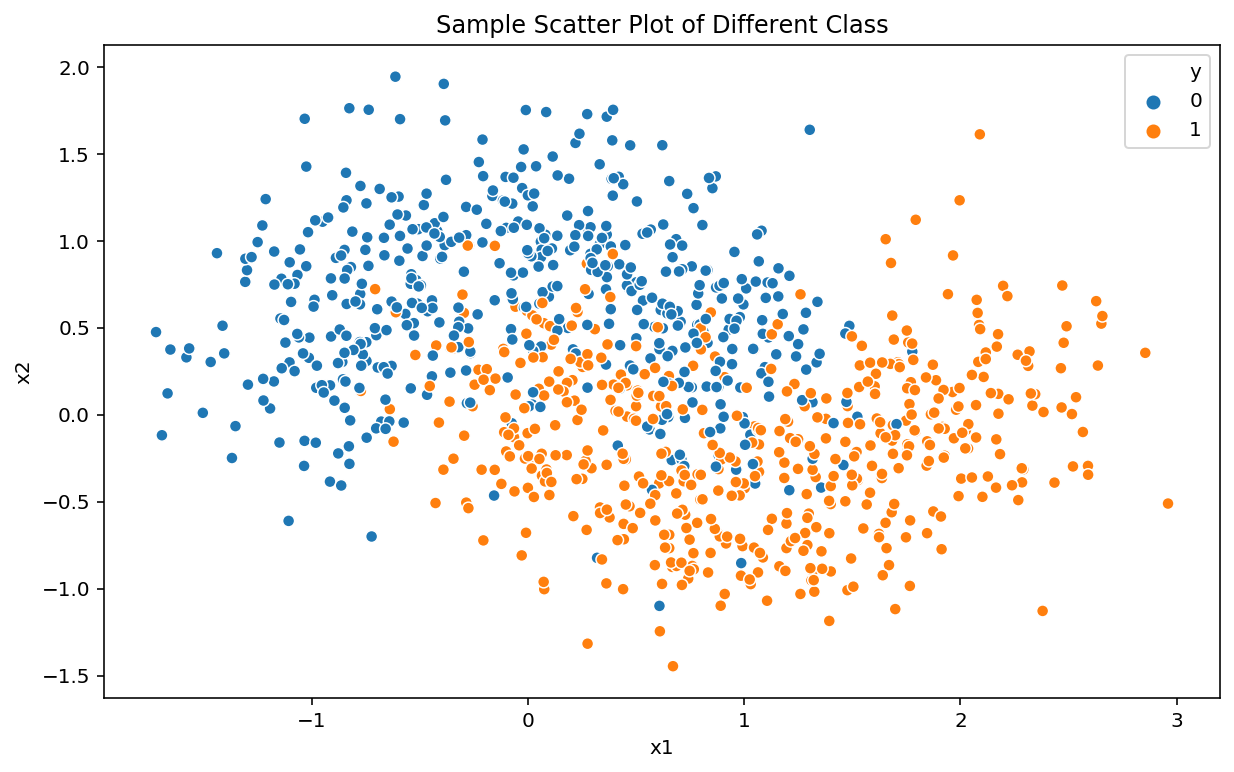

In [649]:
# (a) Generate 1000 random sample as training set
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=1000, noise=0.35)

# (b) Scatterplot your random samples with each class in a different color
import pandas as pd
df = pd.DataFrame({'x1':X_train[:,0], 'x2':X_train[:,1], 'y':y_train})

import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
plt.title('Sample Scatter Plot of Different Class')
plt.show()

In [653]:
# (c)
# Create 3 different random data subsets
df1 = df.sample(100)
df2 = df.sample(100)
df3 = df.sample(100)
X1 = df1[['x1', 'x2']].to_numpy()
y1 = df1.y.to_numpy()
X2 = df2[['x1', 'x2']].to_numpy()
y2 = df2.y.to_numpy()
X3 = df3[['x1', 'x2']].to_numpy()
y3 = df3.y.to_numpy()

# Define function to generate knn classifier
from sklearn.neighbors import KNeighborsClassifier
def knn(k, X_train, y_train, X_test):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X=X_train, y=y_train)
    y_test = classifier.predict(X_test)
    return (classifier, y_test)

# Define the grid as X_test for prediction
nvalues = 500
x1values = np.linspace(-2,3,nvalues)
x2values = np.linspace(-2,2,nvalues)
XX1, XX2 = np.meshgrid(xvalues, yvalues, indexing='ij')
grid = np.array([XX1.ravel(), XX2.ravel()]).T

# For each subset, fit three k-Nearest Neighbor classifiers 𝑘={1,25,50}
# For df1
knn_df1_k1, y_df1_k1 = knn(k=1, X_train=X1, y_train=y1, X_test=grid)
knn_df1_k25, y_df1_k25 = knn(k=25, X_train=X1, y_train=y1, X_test=grid)
knn_df1_k50, y_df1_k50 = knn(k=50, X_train=X1, y_train=y1, X_test=grid)
# For df2
knn_df2_k1, y_df2_k1 = knn(k=1, X_train=X2, y_train=y2, X_test=grid)
knn_df2_k25, y_df2_k25 = knn(k=25, X_train=X2, y_train=y2, X_test=grid)
knn_df2_k50, y_df2_k50 = knn(k=50, X_train=X2, y_train=y2, X_test=grid)
# For df3
knn_df3_k1, y_df3_k1 = knn(k=1, X_train=X3, y_train=y3, X_test=grid)
knn_df3_k25, y_df3_k25 = knn(k=25, X_train=X3, y_train=y3, X_test=grid)
knn_df3_k50, y_df3_k50 = knn(k=50, X_train=X3, y_train=y3, X_test=grid)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

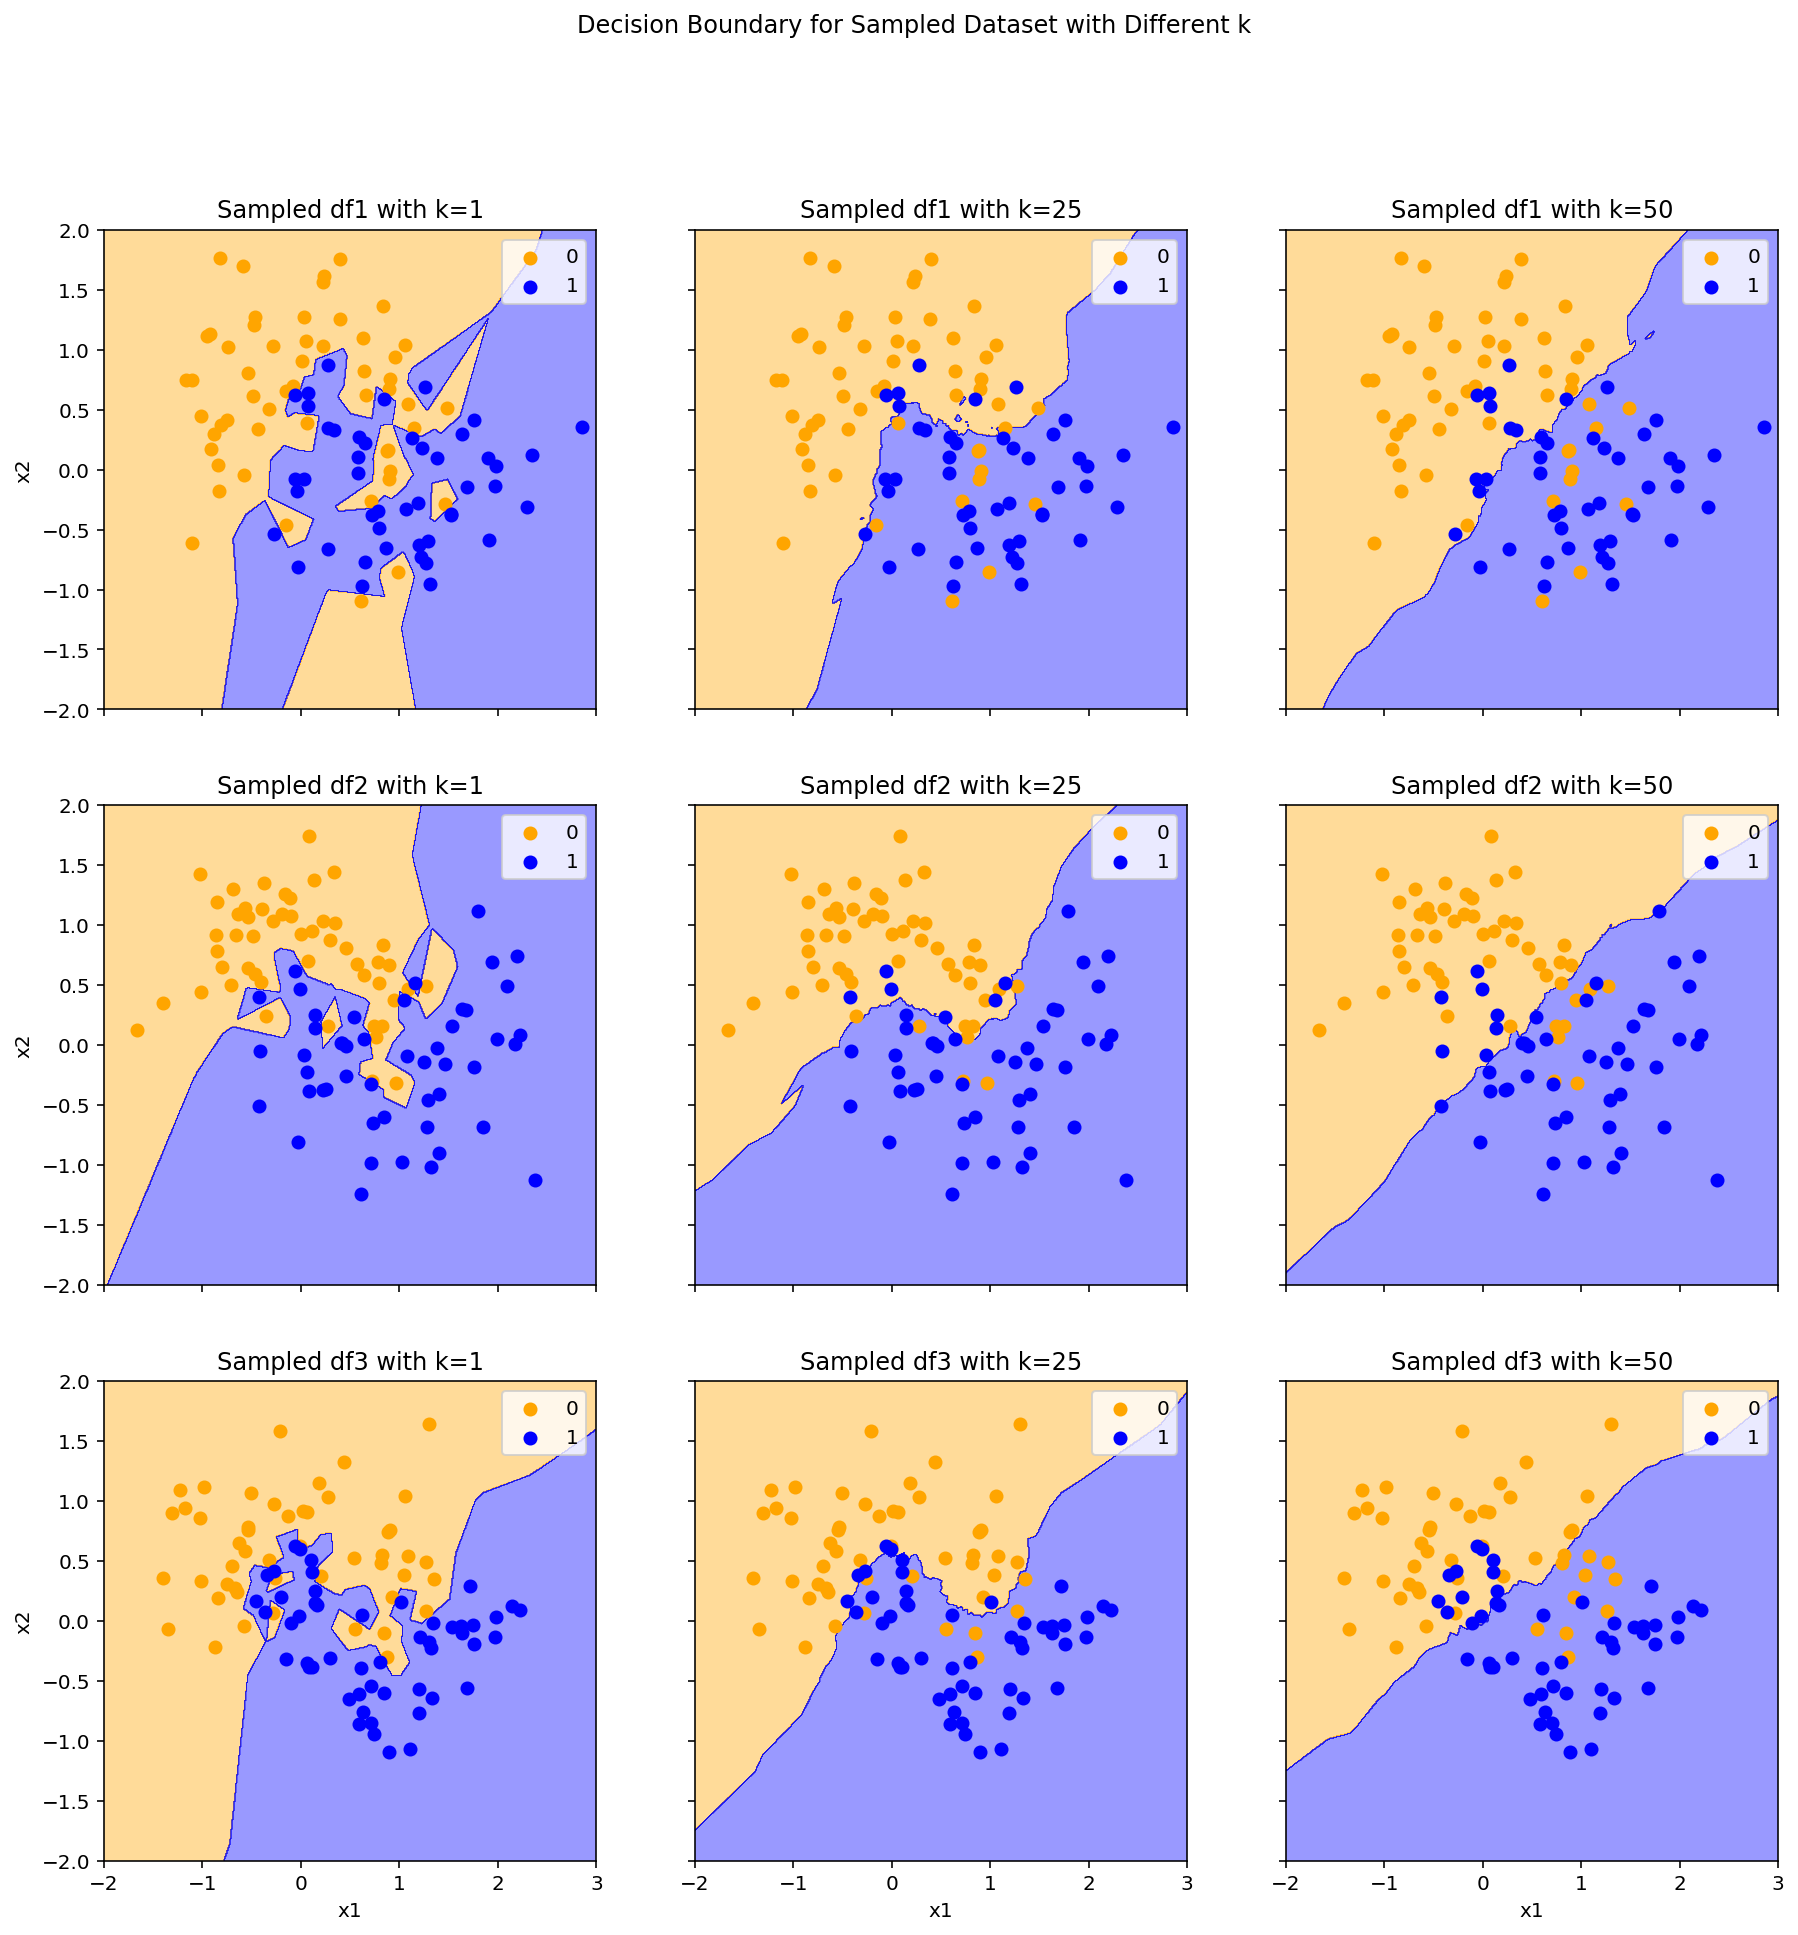

In [654]:
# (d) 
# Define function to plot the decision boundary
from matplotlib.colors import ListedColormap
def plot(ax, XX1, XX2, X_train, y_train, y_test, df_no, k):
    ax.contourf(XX1, XX2, y_test.reshape(XX1.shape), alpha=0.4, 
                 cmap=ListedColormap(('orange', 'blue')))
    #plt.xlim(XX1.min(), XX1.max())
    #plt.ylim(XX2.min(), XX2.max())
    ax.set_title(f'Sampled df{df_no} with k={k}')
    ax.set(xlabel='x1', ylabel='x2')
    for i, j in enumerate(np.unique(y_train)):
        ax.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                    c=ListedColormap(('orange', 'blue'))(i), label=j)
    ax.legend()
    for ax in axs.flat:
        ax.label_outer()


# Each column should represent a different value of k and each row should represent a different dataset
fig, axs = plt.subplots(3, 3, figsize=(15,15))
fig.suptitle('Decision Boundary for Sampled Dataset with Different k')
# For df1
plot(axs[0,0], XX1, XX2, X_train=X1, y_train=y1, y_test=y_df1_k1, df_no=1, k=1)
plot(axs[0,1], XX1, XX2, X_train=X1, y_train=y1, y_test=y_df1_k25, df_no=1, k=25)
plot(axs[0,2], XX1, XX2, X_train=X1, y_train=y1, y_test=y_df1_k50, df_no=1, k=50)
# For df2
plot(axs[1,0], XX1, XX2, X_train=X2, y_train=y2, y_test=y_df2_k1, df_no=2, k=1)
plot(axs[1,1], XX1, XX2, X_train=X2, y_train=y2, y_test=y_df2_k25, df_no=2, k=25)
plot(axs[1,2], XX1, XX2, X_train=X2, y_train=y2, y_test=y_df2_k50, df_no=2, k=50)
# For df3
plot(axs[2,0], XX1, XX2, X_train=X3, y_train=y3, y_test=y_df3_k1, df_no=3, k=1)
plot(axs[2,1], XX1, XX2, X_train=X3, y_train=y3, y_test=y_df3_k25, df_no=3, k=25)
plot(axs[2,2], XX1, XX2, X_train=X3, y_train=y3, y_test=y_df3_k50, df_no=3, k=50)


**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

It can be seen that between different rows within each column, there are significant differences as the data changes suggesting low generalization for small number of k. For large value of k, there is relatively high consistency for different datasets but with higher error rate and the model does not fit the data well. Between different columns within each row, as the number of neighbors (k) increases, there is higher bias, lower flexibility, and a higher chance for underfit. Reversely, as k decreases, there is lower bias, higher variance, and a higher chance for overfit.

In conclusion, the decision boundary with k=25 seems to best separate the two classes of data, as it reaches a balance between bias and variance compared to the other two more extreme cases. The decision boundary with k=1 varies the most as the data changes.

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

When k is small, such as k=1, the decision boundary is overly flexible and finds patterns in the data that don’t correspond to the Bayes decision boundary. Such classifier has low bias but very high variance. As k increases, the decision boundary has a decreasing flexibility and becomes closer to linear. There is lower variance and higher bias with relatively higher consistency. 

With the sampled datasets, it can be seen that neither k=1 nor k=50 performed well. With k=1, while the KNN training error rate can be reduced down to 0, the classifer has significantly high error rate with new datasets leading to poor generalization. With k=50, the classifier underfits the training set of data with high training error rate. Therefore comparatively speaking, k=25 achieves a better balance in terms of the bias-variance tradeoff, providing certain flexibility while avoiding overfits.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [650]:
# (a) 
# Generate 1000 new random sample as test set
X_test, y_test = make_moons(n_samples=1000, noise=0.35)

# (b) 
accur_list = []
from sklearn.metrics import accuracy_score
# Train a kNN classifier and apply to training and test dataset
for i in range(1,501):
    y_pred = knn(i, X_train, y_train, X_test)[1]
    accur_list.append(accuracy_score(y_test, y_pred, normalize=True))

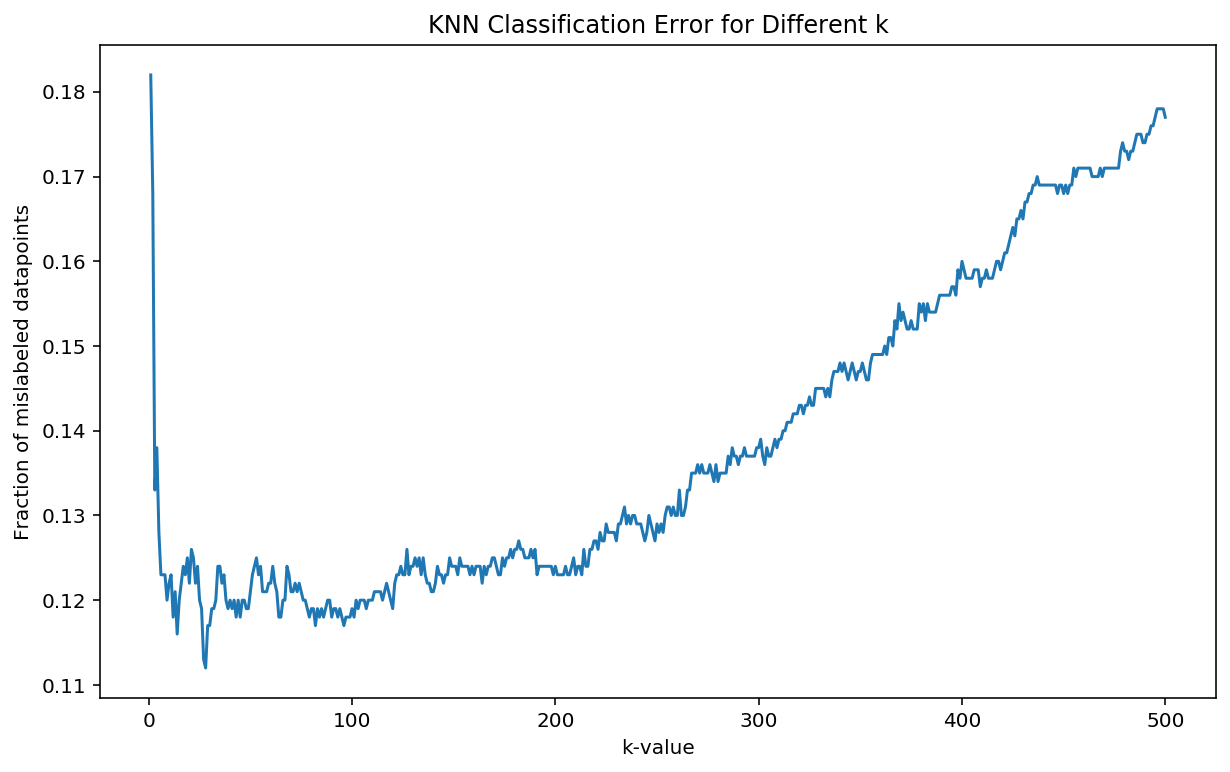

In [651]:
error = np.c_[range(1,501),[(1 - accur) for accur in accur_list]]
# Plot the classification error
plt.figure(figsize=(10,6))
sns.lineplot(x=error[:,0], y=error[:,1])
plt.title('KNN Classification Error for Different k')
plt.xlabel('k-value')
plt.ylabel('Fraction of mislabeled datapoints')
plt.show()

**(c)** What trend do you see in the results?

The classification error is significantly high at small k values, and decreases as k increases to around 50, reaching the minimum error rate. The fraction of mislabeled datapoints increases as k continues to increase. There is a general U-shape for classification errors through a wide range of k values.

**(d)** What values of $k$ represent high bias and which represent high variance?

$k$ with large values (500 as an upper bound extreme in this case), represent high bias. $k$ with small values (1 as a lower bound extreme) represent high variance.

**(e)** What is the optimal value of $k$ and why?

The optimal value of k is 27. This is because at this value, the classification error on the test set reaches the minimum and the model achieves the best balcance between bias and variance.

In [652]:
k_min = (np.where(error[:,1]==np.min(error[:,1]))[0][0])
print(f'The optimal value of k is {k_min}.')

The optimal value of k is 27.


**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In linear regression ($\hat{y_{i}}=\sum_{j=0}^{N} a_{j}x_{i}^{j}$), the model order N controls the flexibility where a higher order leads to a more flexible model.


## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

In [597]:
# Import data files
train = np.genfromtxt('data/A2_Q7_train.csv', delimiter=',', skip_header=1)
test = np.genfromtxt('data/A2_Q7_test.csv', delimiter=',', skip_header=1)
x_train = train[:,1]
y_train = train[:,-1]
x_test = test[:,1]
y_test = test[:,-1]

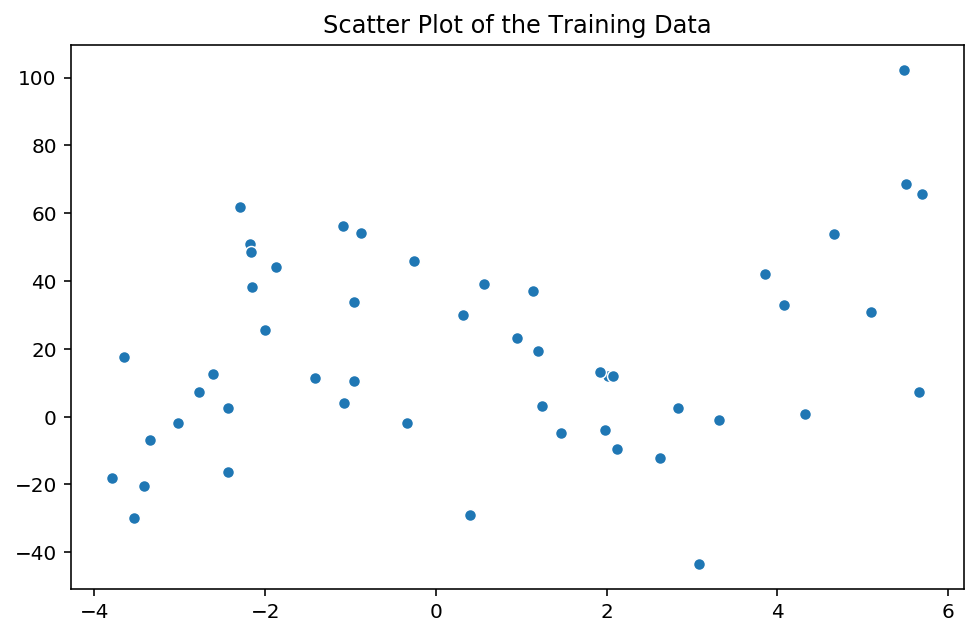

In [598]:
# (a)
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_train, y=y_train)
plt.title('Scatter Plot of the Training Data')
plt.show()

**(b)** The linear regression model for the training data is: $y = 17.20493 + 2.59073 x$. The $R^2$ value and mean square error for the fit of that model for the training data are 0.06486, and 791.41675 respectively.

In [599]:
# (b)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X=x_train.reshape(-1, 1), y=y_train)
a0 = regressor.intercept_
a1 = np.asscalar(regressor.coef_)
y_train_pred = regressor.predict(x_train.reshape(-1,1))
r2 = metrics.r2_score(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
print(f'The estimated linear model is y = {a0:.5f} + {a1:.5f}x for the training data.')
print(f'R2={r2:.5f}')
print(f'Mean Square Error={mse:.5f}')

The estimated linear model is y = 17.20493 + 2.59073x for the training data.
R2=0.06486
Mean Square Error=791.41675


**(c)** By incorprating non-linear feature transformation relationships in the training process, the estimated equation for the multiple regression model is: $y = 24.15543 - 9.25192x - 2.12569x^{2} + 0.89701x^{3}$. The $R^2$ value and mean square error for the fit of that model for the training data are 0.39634, and 510.88497 respectively.

The estimated linear model is y = 24.15543 + -9.25192x + -2.12569x**2 + 0.89701x**3 for the training data.
R2=0.39634
Mean Square Error=510.88497


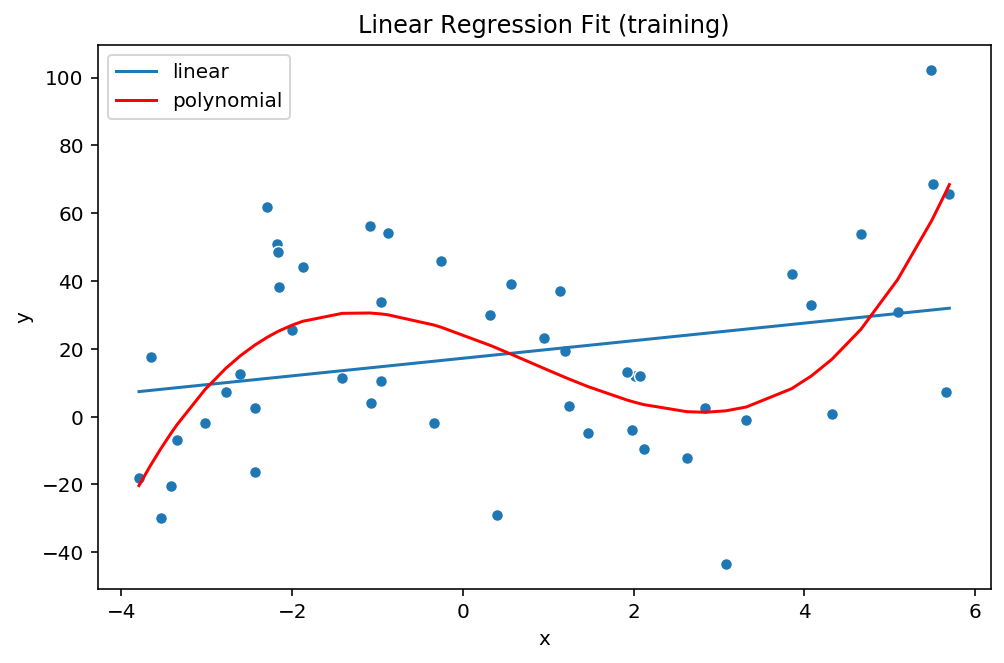

In [600]:
# (c) Incorporate nonlinear feature transformations
x_train_trans = np.c_[x_train, x_train**2, x_train**3]
regressor2 = LinearRegression()
regressor2.fit(X=x_train_trans, y=y_train)
y_train_pred = regressor2.predict(x_train_trans)

a0 = regressor2.intercept_
a1, a2, a3 = regressor2.coef_
r2 = metrics.r2_score(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
print(f'The estimated linear model is y = {a0:.5f} + {a1:.5f}x + {a2:.5f}x**2 + {a3:.5f}x**3 for the training data.')
print(f'R2={r2:.5f}')
print(f'Mean Square Error={mse:.5f}')


# (d) Plot models on training data
plt.figure(figsize=(8,5))
sns.scatterplot(x_train,y_train)
sns.lineplot(x_train, regressor.predict(x_train.reshape(-1,1)), label='linear')
plt.title('Linear Regression Fit (training)')
plt.xlabel('x')
plt.ylabel('y')
sns.lineplot(x_train_trans[:,0], regressor2.predict(x_train_trans), color='red', label='polynomial')
plt.legend()
plt.show()

For the test dataset in the simple linear model: 
R2=-0.13290
Mean Square Error=1116.66324
For the test dataset in the polynomial model: 
R2=0.22945
Mean Square Error=759.50314


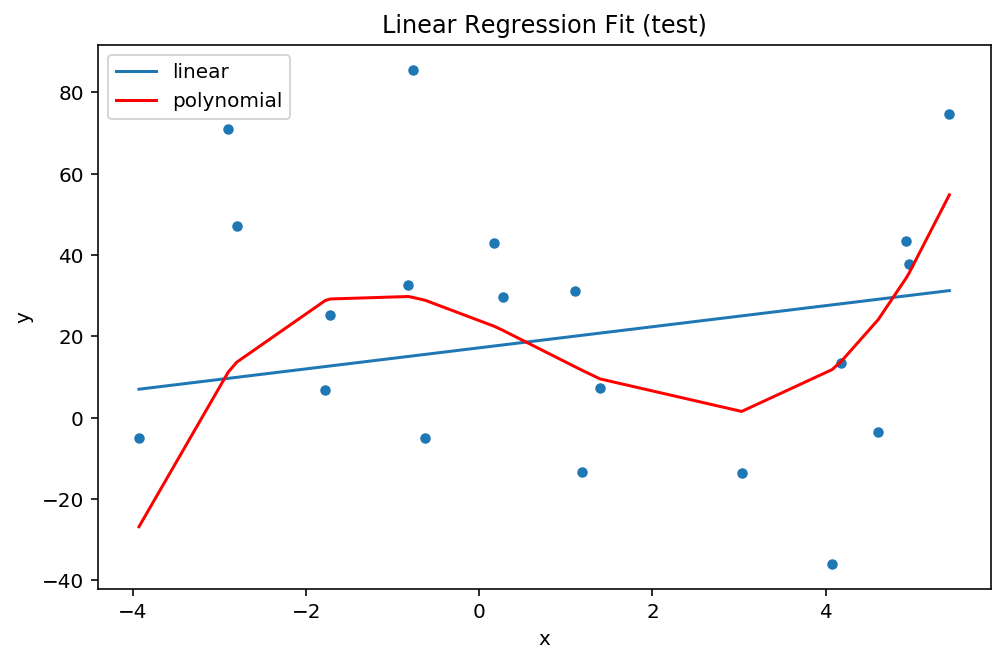

In [601]:
# (e) Apply models to the test data and estimate R2 and MSE of the test dataset

# linear
y_test_pred = regressor.predict(x_test.reshape(-1,1))
r2 = metrics.r2_score(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
print(f'For the test dataset in the simple linear model: \nR2={r2:.5f}')
print(f'Mean Square Error={mse:.5f}')

# transformed
x_test_trans = np.c_[x_test, x_test**2, x_test**3]
y_test_pred = regressor2.predict(x_test_trans)
r2 = metrics.r2_score(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
print(f'For the test dataset in the polynomial model: \nR2={r2:.5f}')
print(f'Mean Square Error={mse:.5f}')

# Plot models on test data
plt.figure(figsize=(8,5))
sns.scatterplot(x_test,y_test)
sns.lineplot(x_test, regressor.predict(x_test.reshape(-1,1)), label='linear')
plt.title('Linear Regression Fit (test)')
plt.xlabel('x')
plt.ylabel('y')
sns.lineplot(x_test_trans[:,0], regressor2.predict(x_test_trans), color='red', label='polynomial')
plt.legend()
plt.show()

**(f)** Which models perform better on the training data, and which on the test data? Why?

The polynomial model performs better both on the training data and test data. This is because that the polynomial model has more predictors and higher flexibility to fit the training data better. As seen from the scatter plot of the original data points, there exist strong non-linear relationships which can be accounted by polynomial functions. In the test data, the data points are more scattered around and there might exist more complicated non-linear high-order relationships. Although both models perform poorly on test data, the polynomial model appears to be a better fit with better representation of the data with more flexibility and less bias.

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

It is assumed that the training and test set are representative of the true data distribution. Therefore the model fitted with training set should have certain predictive capability when generalized to new data, i.e. the test set. If the test data were significantly different from the training dataset, any models fitted from the training set would lose their predictive power due to lack of relationship between training and test data.
